# Clasificador de Vocales
El presente Notebook está basado en el proyecto final que se
entregó en la materia de Teoría de Señales y Comunicaciones.
En él se clasificó las 5 vocales con audios de 5 integrantes
que conformaban el equipo.

Los audios están en un formato '.wav' con una duración de 1.5
segundos a una frecuencia de muestreo de 8000 Hertz. Aunque,
después de grabar, los audios resultaron a 1.44 segundos.

## Procesamiento de datos
La entrada que recibirá el modelo estará compuesta de la fft
del audio. Aunque, el hecho de estar compuesto de números que
son imaginarios hace que solo conservemos la magnitud de las
frecuencias, es decir, el proceso sería:

- Lectura del audio
- FFT del audio
- Espectro de magnitud
- Tomamos solo la parte positiva

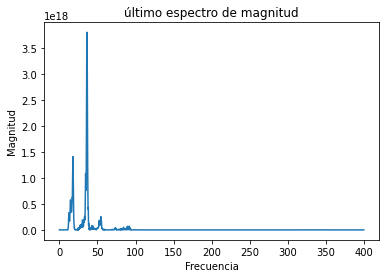

In [1]:
from scipy.io import wavfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

nombres = ['Alberto', 'Yosafat', 'Joksan', 'Alonso', 'Pablo']
vocales = ['a', 'e', 'i', 'o', 'u']
rows = 133
next_pow = 16384 # Potencia del 2
mitad = int(next_pow/2)
dataset = np.zeros(shape=(rows, mitad))
classes = [None] * rows
magnitud = np.zeros(shape=(1, mitad))
k = 0

for name in nombres:
    for i in range(0, 10):
        for vowel in vocales:
            archivo = name + '-' + vowel + '-' + str(i)

            try:
                fs, muestra = wavfile.read('../data/' + archivo + '.wav')
            except FileNotFoundError:
                continue

            fourier = np.fft.fft(muestra, n=next_pow)
            magnitud = np.abs(fourier) ** 2 / next_pow # Normalizado
            classes[k] = vowel
            dataset[k, :] = magnitud[0:mitad]
            k = k + 1

#Gráfica de cómo se ve el espectro de magnitud partido
f = np.arange(0, next_pow - 1) * (8000/next_pow) / 10
plt.xlabel('Frecuencia')
plt.ylabel('Magnitud')
plt.title('último espectro de magnitud')
plt.plot(f[0:mitad], magnitud[0:mitad])

#Obtenemos las labels y guardamos dataset y labels
serie = pd.Series(classes)
dataframe = pd.get_dummies(serie)
labels = dataframe.values
np.save('../models/dataset.npy', dataset)
np.save('../models/labels.npy', labels)

## PCA
Ahora que tenemos el dataset en forma de matriz de Numpy,
sabemos que muchas de las frecuencias se van a 0, por lo
que una reducción en el tamaño del dataset vendría muy bien.

In [2]:
from sklearn.decomposition import PCA
pca_obj = PCA()
data = pca_obj.fit_transform(dataset)
print(data.shape)

(133, 133)


## Árbol de decisión
Como el dataset no es algo tan grande, podemos clasificarlo
mediante un árbol.

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

split_dataset = train_test_split(data, labels)
train_data = split_dataset[0]
test_data = split_dataset[1]
train_labels = split_dataset[2]
test_labels = split_dataset[3]

tree_obj = DecisionTreeClassifier()
tree_obj.fit(train_data, train_labels)

predictions = tree_obj.predict(test_data)
MAE = mean_absolute_error(predictions, test_labels)
MSE = mean_squared_error(predictions, test_labels)

print('MAE: {}\n'.format(MAE))
print('MSE: {}\n'.format(MSE))

MAE: 15.064705882352943

MSE: 0.12352941176470589



# Pruebas con el modelo
Ahora que tenemos el modelo listo, procedemos a probarlo

In [ ]:
fs = 8000
duration = 1.44

print('Grabando Audio')